# Lab 8 : Star Formation 

In [55]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [103]:
#converting from luminosity to star formation rate
def starformationrate(L, type, TIR=0):
    '''
    Function that computes star formation rate (SFR) of a galaxy following Kennicutt&Evans2012 Eq 12 (ARA&A 50)
    PARAMETERS
    Inputs: L -> 'float', luminosity of the galaxy (erg/s)
            type -> 'string', the wavelength; either 'FUV', 'NUV', 'TIR', or 'Halpha'
            TIR -> 'float', total infrared luminosity (erg/s), default = 0
            
    Outputs: SFR -> 'float', log of the star formation rate (Msun/yr)
    '''
    
    if (type =='FUV'):
        #far UV
        logCx = 43.35 #calibration from L(FUV) to SFR
        TIRc = 0.46 #correction for dust absorption
    elif (type =='NUV'):
        #near UV
        logCx = 43.17 #calibration from 
        TIRc = 0.27
    elif (type == 'Halpha'):
        logCx = 41.27
        TIRc = .0024
    elif (type =='TIR'):
        logCx = 43.41
        TIRc = 0
    else:
        print('WARNING: Missing the wavelength. Code accepts FUV, NUV, Halpha, or TIR')

    #Correct the luminosity for dust using the TIR
    Lcorr = L + TIRc*TIR #luminosity correction 

    #star formation rate
    SFR = np.log10(Lcorr) - logCx
    
    return SFR

Let's try to reproduce SFRs derived for the WLM Dwarf Irregular Galaxy using UV luminosities measured with Galex. 

Compare results to Table 1 from Lee et al. 2009 (who used the older Kennicutt 98 methods)
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED (Photometry and SED):
https://ned.ipac.caltech.edu/

In [59]:
# First need the Luminosity of the Sun in the right units
    #will load in units of Lsun
const.L_sun


<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [60]:
LsunErgS = const.L_sun.to(u.erg/u.s).value
print(LsunErgS)

3.828e+33


In [61]:
#  WLM Dwarf Irregular Galaxy
# from NED GALEX DATA

NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = 2.48e6*LsunErgS + 3.21e5*LsunErgS + 2.49e6*LsunErgS
#TIR = NIR + MIR + FIR


In [62]:
#test
starformationrate(NUV_WLM, 'NUV', TIR_WLM)

#when something is broken in code, add print statements as often as possible to figure out what's going wrong

-2.319186168309912

# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift, given its stellar mass

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [65]:
def SFRmainsequence(Mstar, z):
    '''
    Function that computes average SFR of a galaxy as a function of stellar mass and redshift
    PARAMETERS
    Inputs: MStar -> 'float', stellar mass of the galaxy (Msun)
            z -> 'float,' redshift
    Outputs: SFR -> 'float', log of the SFR (Msun/yr)
    '''
    alpha = .7 - .13*z
    beta = .38 + 1.14*z - .19*z**2
    SFR = alpha*(np.log10(Mstar) - 10.5) + beta

    return SFR
    

# Step 2

In [67]:
# MW stellar mass (disk) at z = 0

MWmstar = 7.5e10


In [68]:
#SFR for a MW type galaxy

print(SFRmainsequence(MWmstar, 0)) #log 
print(10**SFRmainsequence(MWmstar, 0)) #not log (in stellar masses/year)

0.64254288437419
4.390792203431891


In [107]:
# MW at z = 1

print(SFRmainsequence(MWmstar, 1))
print(10**SFRmainsequence(MWmstar, 1))


1.5437849201332692
34.97719031976979


# Step 3

In [97]:
#want to make a plot of redshift on main sequence

# create an array of stellar masses
Mass = np.linspace(1e8, 1e12) #NOT log spacing, linear spacing

<Figure size 640x480 with 0 Axes>

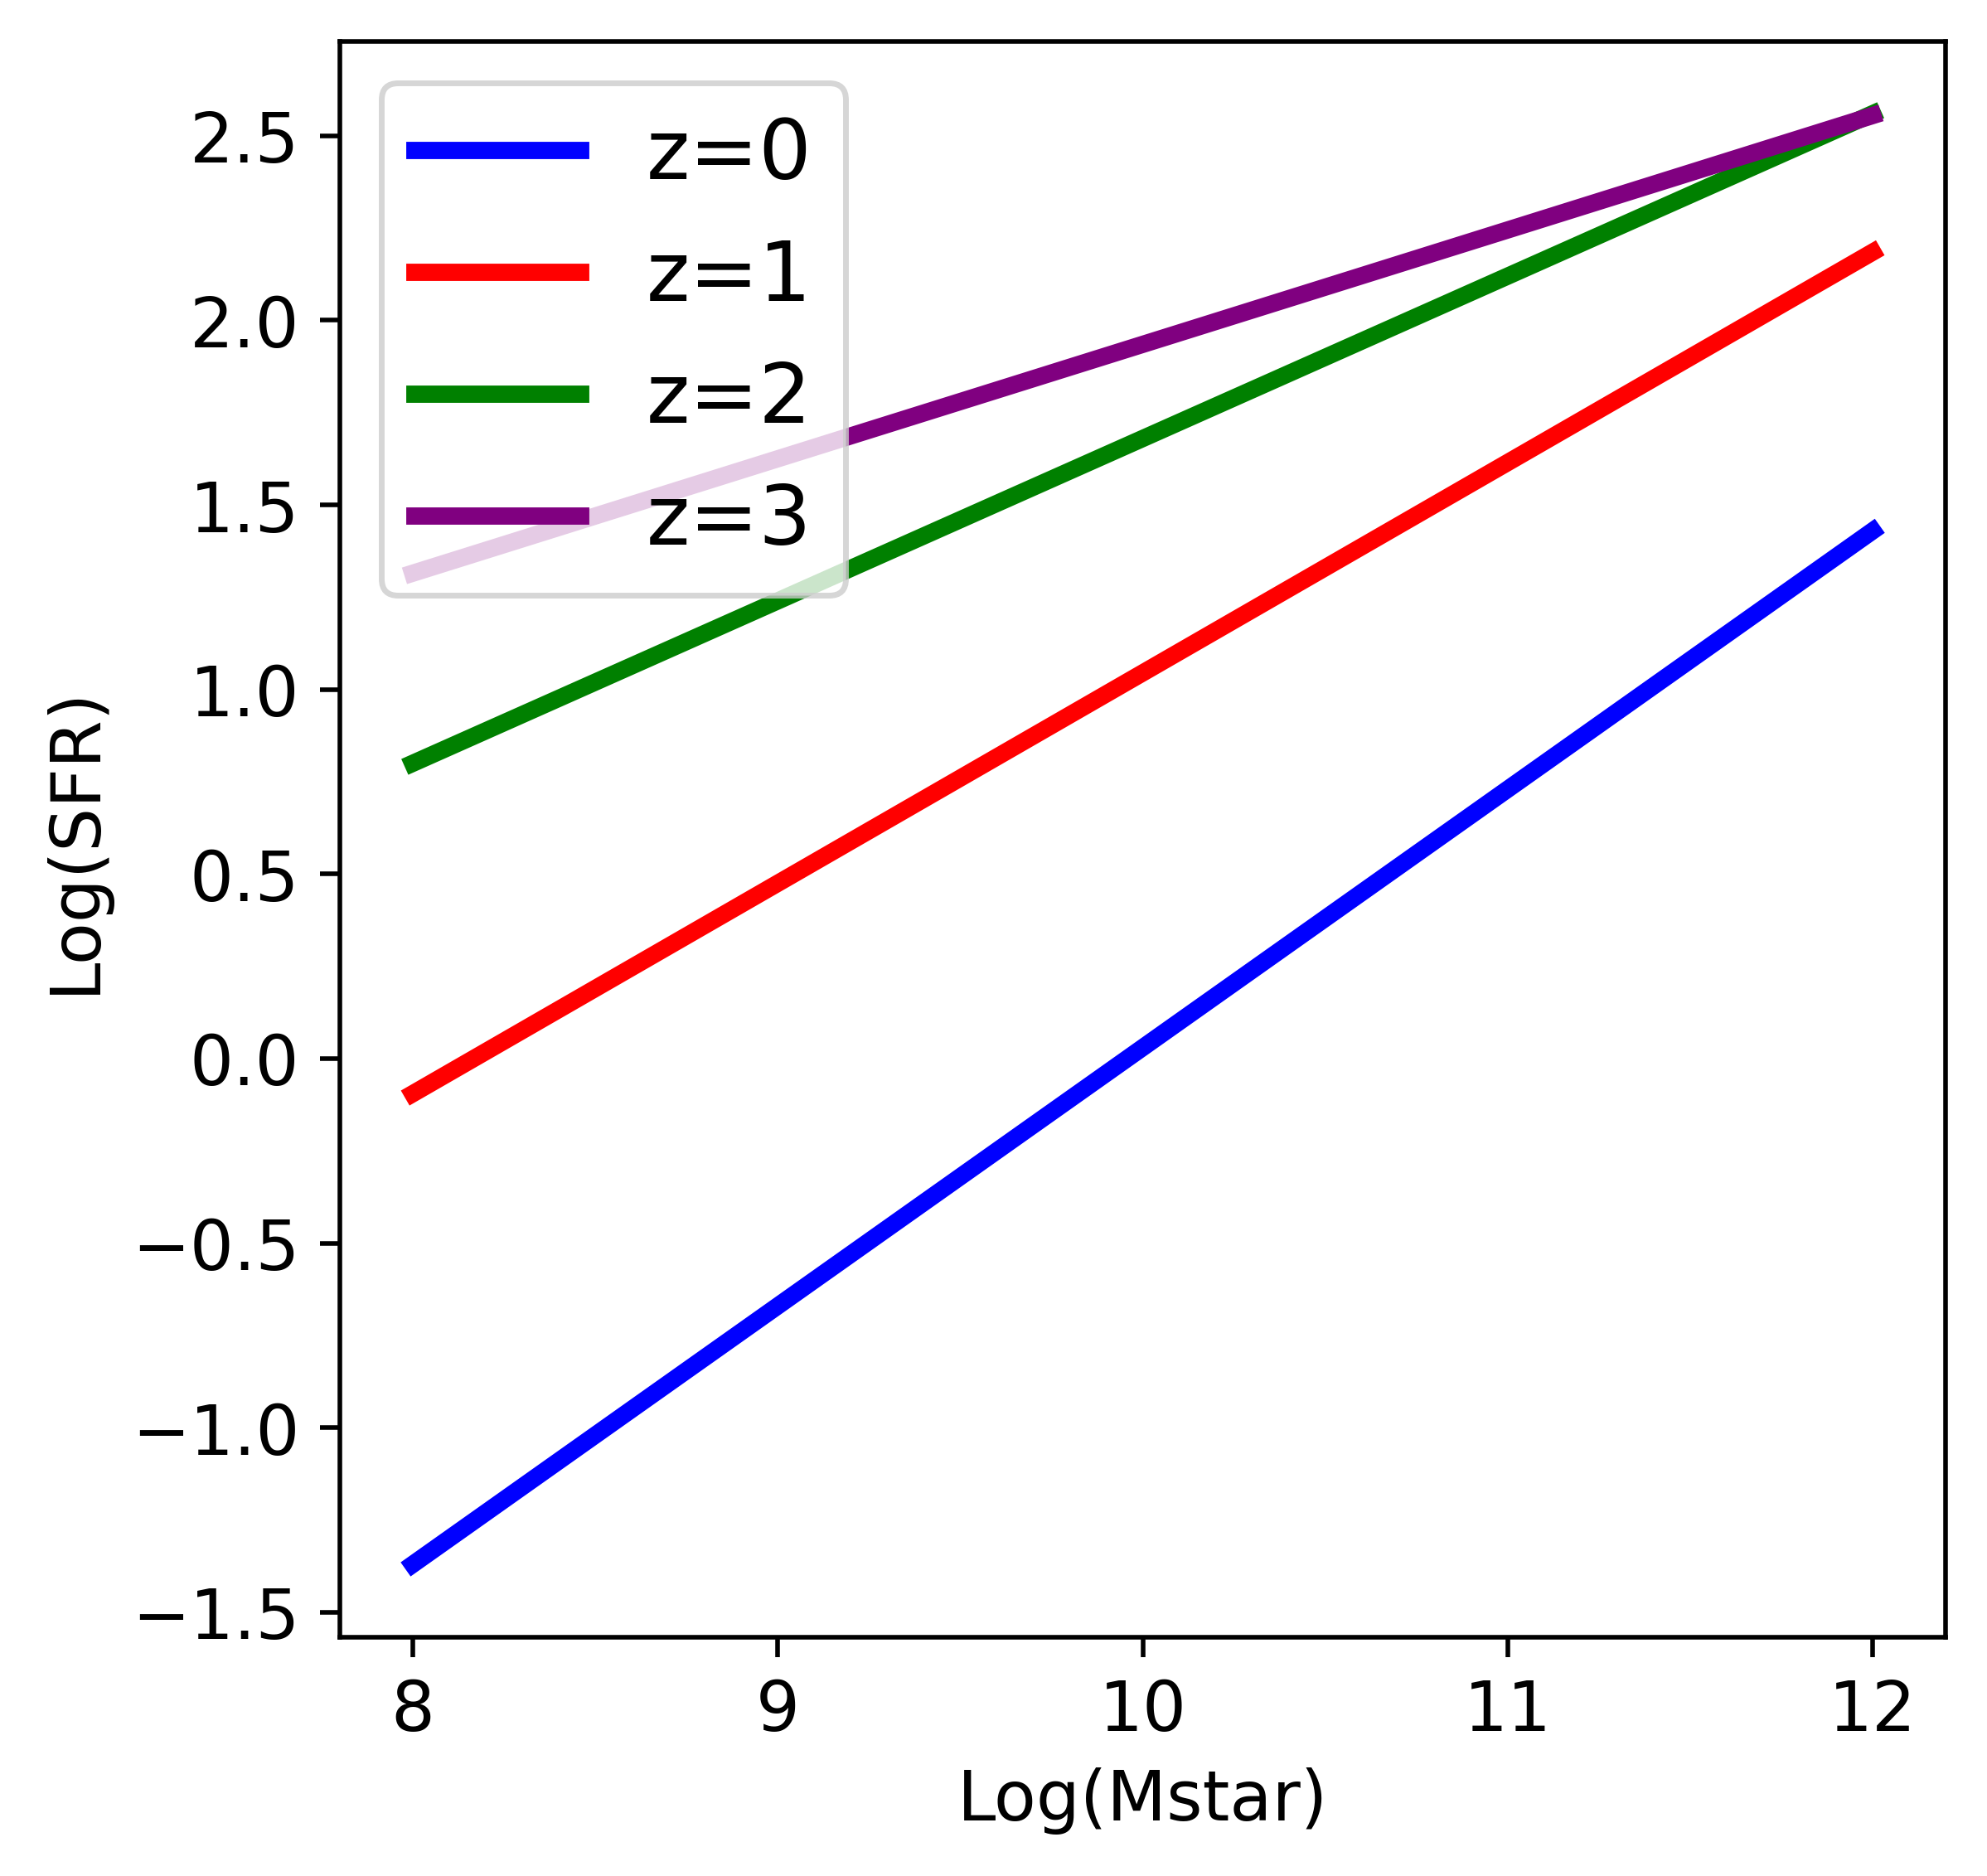

In [129]:

fig = plt.figure(figsize=(5,5), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.plot(np.log10(Mass), SFRmainsequence(Mass, 0), color = 'blue', linewidth = 3, label = 'z=0')
#can give SFRmainsequnce either a single value or an array for mass

plt.plot(np.log10(Mass), SFRmainsequence(Mass, 1), color = 'red', linewidth = 3, label = 'z=1')

plt.plot(np.log10(Mass), SFRmainsequence(Mass, 2), color = 'green', linewidth = 3, label = 'z=2')

plt.plot(np.log10(Mass), SFRmainsequence(Mass, 3), color = 'purple', linewidth = 3, label = 'z=3')

# Add axis labels
#plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
#plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)
    #this gets a syntax error that doesn't let graphs go through

plt.xlabel('Log(Mstar)', fontsize=12)
plt.ylabel('Log(SFR)', fontsize=12)

#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')

# Save file
plt.savefig('Lab8_SFR_MainSequence.png')

plt.show()

# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [135]:
# normal galaxies 
TIR_normal = 1e10*LsunErgS
print(10**starformationrate(TIR_normal, 'TIR'))

#these numbers are all in solar masses/year
#so, for normal galaxies this is ~1

1.4892648150381245


In [75]:
# LIRGs  


In [76]:
# ULIRGs

In [137]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS
print(10**starformationrate(TIR_HLIRG, 'TIR'))
#for HLIRGs it's ~1000! crazy jump

1489.2648150381244
